# Linear Regression with DataFrame_Commodities

## Checking the stationarity of the data
Before performing a linear regression, it is essential to check whether the time series is stationary. A stationary series has constant statistical properties (such as mean and variance) over time. If the data are not stationary, the regression results may be unreliable.

How to Verify Stationarity?
We will use the Augmented Dickey-Fuller (ADF) test. The null hypothesis of this test is that the series is not stationary (has a unit root). If the p-value is less than 0.05, we reject the null hypothesis and conclude that the series is stationary.

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_excel('Data_Frame_Commodities.xlsx')
print(df)

           Soya        Zinc       Plata        Oro  Gas Natural  Exportaciones
0     26.315732   14.767585    5.787983   4.002464    65.553808     182.868403
1     33.120706   12.298601    5.351945   2.486342    63.595405     183.123713
2     22.886984   17.369882   11.026101   5.109104    76.450654     214.056343
3     36.149806   19.479514    6.331060   4.173793    82.305499     230.771407
4     49.018702   16.923473    9.447432   2.942544    81.977761     283.191098
..          ...         ...         ...        ...          ...            ...
234  111.510228  134.212232  113.913844  54.299215   145.419014     822.854223
235  113.604871  100.447379  121.421269  39.484441   141.353848     796.156819
236   90.773331  109.833423  125.434717  60.551899   112.592591     770.484390
237   44.836684  150.493252  129.707445  61.191819   106.578740     727.348118
238   43.623023  136.284246  122.805597  29.120758   113.290381     705.747672

[239 rows x 6 columns]


In [ ]:
columns = ['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural', 'Exportaciones']

print("Results of the ADF test for stationarity:")

for col in columns:
    
    if col in df.columns:
        
        result = adfuller(df[col])
        p_value = result[1]
        
        print(f'{col}: p-valor = {p_value:.4f}')
        
        if p_value < 0.05:
            print(f'  -> {col} it´s stationary')
        else:
            print(f'  -> {col} it isn´t stationary and needs transformation')
    else:
        print(f'La columna {col} not found.')

Results of the ADF test for stationarity:
Soya: p-valor = 0.1581
  -> Soya it isn´t stationary and needs transformation
Zinc: p-valor = 0.1073
  -> Zinc it isn´t stationary and needs transformation
Plata: p-valor = 0.3089
  -> Plata it isn´t stationary and needs transformation
Oro: p-valor = 0.2893
  -> Oro it isn´t stationary and needs transformation
Gas Natural: p-valor = 0.2763
  -> Gas Natural it isn´t stationary and needs transformation
Exportaciones: p-valor = 0.1354
  -> Exportaciones it isn´t stationary and needs transformation


### Transform the series using the technique of differentiation

In [ ]:
df_diff = df[columns].diff().dropna()


print("\nADF test results after differentiation:")
for col in columns:
    result = adfuller(df_diff[col])
    p_value = result[1]
    print(f'{col}: p-valor = {p_value:.4f}')
    if p_value < 0.05:
        print(f'  -> {col} now stationary')
    else:
        print(f'  -> {col} not yet stationary (consider another transformation)')


ADF test results after differentiation:
Soya: p-valor = 0.0030
  -> Soya now stationary
Zinc: p-valor = 0.0000
  -> Zinc now stationary
Plata: p-valor = 0.0000
  -> Plata now stationary
Oro: p-valor = 0.0000
  -> Oro now stationary
Gas Natural: p-valor = 0.0085
  -> Gas Natural now stationary
Exportaciones: p-valor = 0.0000
  -> Exportaciones now stationary


## We perform Multivariate Linear Regression
With the stationary series, we will fit a linear regression model where the dependent variable is 'Exports' and the independent variables are 'Soybean', 'Zinc', 'Silver', 'Gold' and 'Natural Gas'. 
The model is expressed as follows:

Exportaciones=β 
0
​
 +β 
1
​
 ⋅Soya+β 
2
​
 ⋅Zinc+β 
3
​
 ⋅Plata+β 
4
​
 ⋅Oro+β 
5
​
 ⋅Gas Natural+ϵ

In [7]:
import statsmodels.api as sm


data_to_use = df_diff  
X = data_to_use[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']]
y = data_to_use['Exportaciones']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exportaciones   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     383.1
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          6.35e-110
Time:                        11:04:36   Log-Likelihood:                -1099.9
No. Observations:                 238   AIC:                             2212.
Df Residuals:                     232   BIC:                             2233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3664      1.616      0.227      

# Analysis of Results:
## Model Performed: Ordinary Least Squares.

The model indicates the following variables: 
'Exports' as the dependent variable. This means that the model predicts the value of exports based on the independent variables (Soybean, Zinc, Silver, Gold, Natural Gas).

\R-Squared : 0.892 --> 89.2% of the variability in exports is explained by the independent variables, indicating a good fit of the model and confirming that the 5 products, both traditional and non-traditional, are the most influential in exports.

\Adjusted R-squared: 0.890 --> Similar to R-squared, but adjusted for the number of variables, confirming that the model remains robust.

\F-statistic: 383.1 with a p-value of 6.35e-110. This indicates that the model, as a whole, is statistically significant (p<0.05), i.e., the independent variables have a relevant impact on exports.

## Coefficients of the independent variables

\Constant (intercept): 0.3664 with a p-value of 0.821 (Not significant (p>0.05)), which means that when all independent variables are zero, exports do not have a significant base value. There is logic in the result.

\Soya: 1.1196, p-value = 0.000. For each unit increase in Soya, exports increase by 1.1196 units, and is highly significant.

\Zinc: 1.1376, p-value = 0.000. For each unit increase in Zinc, exports increase by 1.1376 units, and is highly significant.

\Silver: 1.6744, p-value = 0.000. For each unit increase in Silver, exports increase by 1.6744 units, it has the highest impact.

\Gold: 1.0760, p-value = 0.000. For each unit increase in Gold, exports increase by 1.0760 units.

\Natural Gas: 1.1545, p-value = 0.000. For each unit increase in Natural Gas, exports increase by 1.1545 units.

## Standard Error
\Soya: 0.065 --> Standard error is lower than that of Silver, being the coefficient of Soybean much more accurate than that of Silver.

\Zinc: 0.108 --> Higher incentive compared to soybeans.

\Silver:0.136 --> Higher incentive compared to Soybean

\Gold: 0.057

\Natural Gas: 0.056

## 📊Confidence Intervals
Confidence intervals provide a range within which, with 95% confidence, the true value of the coefficient lies.

This measures the uncertainty in the estimate.
\Soya = [0.991   -    1.248]
\Zinc = [0.924   -    1.351]
\Plata = [1.407  -     1.942]
\Oro = [0.963    -   1.189]
\Gas Natural = [1.044   -    1.265]

##Displaying
| Raw Material | Min. Coefficient | Max. Coefficient|
|---------------|--------------|--------------|
| **Soya**      | 0.991        | 1.248        |
| **Zinc**      | 0.924        | 1.351        |
| **Plata**     | 1.407        | 1.942        |
| **Oro**       | 0.963        | 1.189        |
| **Gas Natural** | 1.044      | 1.265        |

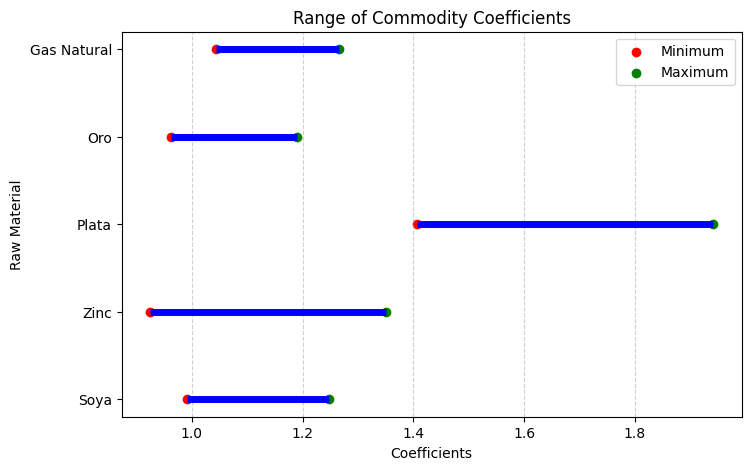

In [8]:
import matplotlib.pyplot as plt

# Datos
materias_primas = ["Soya", "Zinc", "Plata", "Oro", "Gas Natural"]
coeficiente_min = [0.991, 0.924, 1.407, 0.963, 1.044]
coeficiente_max = [1.248, 1.351, 1.942, 1.189, 1.265]

# Crear gráfico de barras de rangos
plt.figure(figsize=(8, 5))
plt.hlines(materias_primas, coeficiente_min, coeficiente_max, colors='blue', lw=5)
plt.scatter(coeficiente_min, materias_primas, color='red', label="Minimum")
plt.scatter(coeficiente_max, materias_primas, color='green', label="Maximum")

# Etiquetas y título
plt.xlabel("Coefficients")
plt.ylabel("Raw Material")
plt.title("Range of Commodity Coefficients")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.show()

In [9]:
# Demostrando los rangos
materias_primas = ["Soya", "Zinc", "Plata", "Oro", "Gas Natural"]
coeficiente_min = [0.991, 0.924, 1.407, 0.963, 1.044]
coeficiente_max = [1.248, 1.351, 1.942, 1.189, 1.265]

# Calcular los rangos
rangos = [maximo - minimo for maximo, minimo in zip(coeficiente_max, coeficiente_min)]

# Encontrar el rango más corto
rango_minimo = min(rangos)
indice_rango_minimo = rangos.index(rango_minimo)
materia_prima_minima = materias_primas[indice_rango_minimo]

#Mostrar los resultados
print("Ranges of raw material coefficients:")
for materia, minimo, maximo, rango in zip(materias_primas, coeficiente_min, coeficiente_max, rangos):
    print(f"{materia}: {maximo:.3f} - {minimo:.3f} = {rango:.3f}")

Ranges of raw material coefficients:
Soya: 1.248 - 0.991 = 0.257
Zinc: 1.351 - 0.924 = 0.427
Plata: 1.942 - 1.407 = 0.535
Oro: 1.189 - 0.963 = 0.226
Gas Natural: 1.265 - 1.044 = 0.221


### Model diagnosis
### Omnibus

\Omnibus: 0.860 
\ Prob (omnibus): 0.650

This indicates that there is insufficient evidence to reject the normality of the model because the p-value > 0.05, suggesting that the residuals are approximately normal.

\Durbin Watson: 2.659

Because the result is greater than 2, it suggests that there is a slight indication of positive autocorrelation in the residuals, which could be problematic.

\Jarque - Bera: 0.622
\ÒProb(JB): 0.733

With a p-value > 0.05, there is no evidence that the residuals are not normal. This reinforces my Omnibus result approximating that the residuals are normal.

\Skew: -0.109

The residuals indicate a slight negative skewness, however it is not significant because the value is close to 0. It supports the normality of the residuals.

\Kurtosis: 3.121

The result indicates that the concentration of the residuals in the tails of the distribution demonstrate a leptokurtosis. However it is a slight increase from the normal distribution, it is acceptable for the model.

\Condition Number: 30.1
The value is greater than 30, which indicates severe multicollinearity between the independent variables, therefore it could suggest that the coefficients are unstable. 

In [10]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asegurarse si existe multicolinealidad

# Definir las columnas de las variables independientes (excluyendo 'Exportaciones' si es la dependiente)
independent_vars = ['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']

# Verificar que las columnas existan en df_diff
for col in independent_vars:
    if col not in df_diff.columns:
        print(f"Error: Column {col} is not in df_diff. check available columns:")
        print(df_diff.columns)
        exit()

# Crear un DataFrame con las variables independientes
X = df_diff[independent_vars]

# Añadir una constante (intercepto) para el modelo de regresión
X = sm.add_constant(X)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir los resultados
print("Variance Inflation Factors (VIF):")
print(vif_data)

# Interpretación adicional
print("\nInterpretation:")
print("VIF < 5: Low or no multicollinearity.")
print("VIF between 5 and 10: Moderate multicollinearity, consider it.")
print("VIF > 10: Severe multicollinearity, adjust the model (e.g., eliminate variables).")

Variance Inflation Factors (VIF):
      Variable       VIF
0        const  1.001728
1         Soya  1.028528
2         Zinc  1.262277
3        Plata  1.220988
4          Oro  1.055625
5  Gas Natural  1.020981

Interpretation:
VIF < 5: Low or no multicollinearity.
VIF between 5 and 10: Moderate multicollinearity, consider it.
VIF > 10: Severe multicollinearity, adjust the model (e.g., eliminate variables).


## Is there Multicollinearity?
No, by performing the Variance Inflation Factors (VIF) calculation, we can observe that no product exceeds the parameter to be considered Multicollinearity. Therefore, there is no significant multicollinearity between the independent variables in the DataFrame. Low VIFs are a reliable indication that Soybean, Zinc, Silver, Gold and Natural Gas are not correlated in a problematic way.

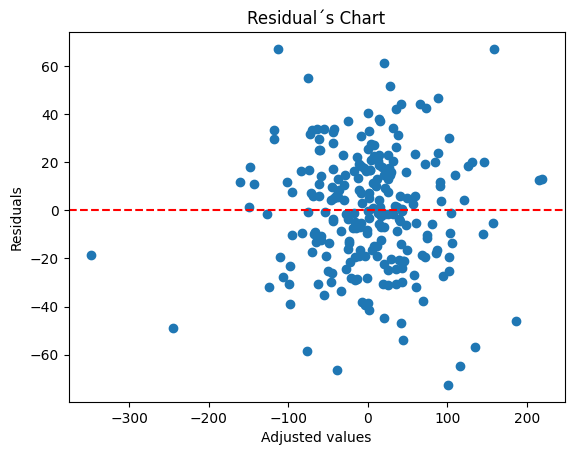

In [17]:
import matplotlib.pyplot as plt

residuos = model.resid
plt.scatter(model.fittedvalues, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Adjusted values')
plt.ylabel('Residuals')
plt.title('Residual´s Chart')
plt.show()

## Graphs: 
## Histogram of Residuals.
Shows the distribution of residuals (Differences between observed and predicted values).

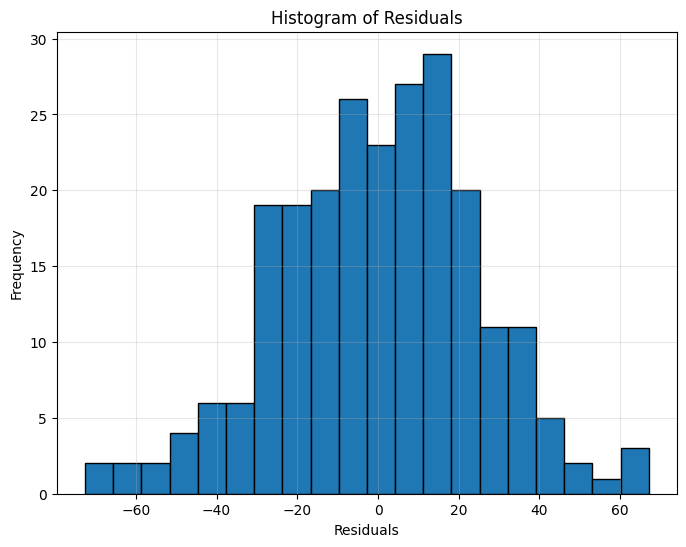

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asegúrate de que 'model' esté definido (ajusta tu modelo OLS con df_diff)
X = sm.add_constant(df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']])
y = df_diff['Exportaciones']
model = sm.OLS(y, X).fit()

# Obtener los residuos
residuals = model.resid

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

## Q-Q Plot of Residuals
The Quantile-Quantile plot compares the quantiles of the residuals with the quantiles of a theoretical normal distribution. In this way we evaluate yd demonstrate the normality of the residuals. 

<Figure size 800x600 with 0 Axes>

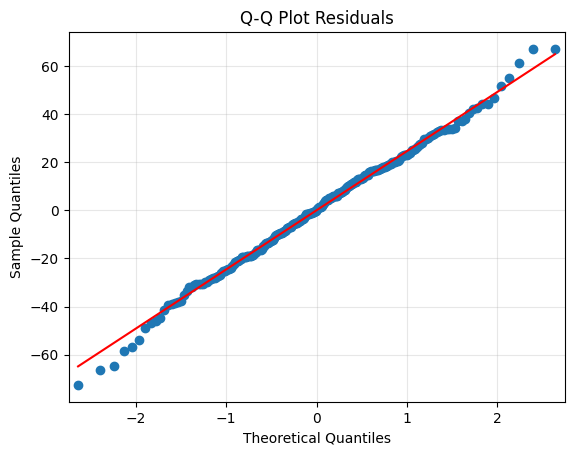

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asegúrate de que 'model' esté definido (ajusta tu modelo OLS con df_diff)
X = sm.add_constant(df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']])
y = df_diff['Exportaciones']
model = sm.OLS(y, X).fit()

# Obtener los residuos
residuals = model.resid

# Crear el Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')  # 's' ajusta la línea a los cuantiles de la muestra
plt.title('Q-Q Plot Residuals')
plt.grid(True, alpha=0.3)
plt.show()

## Graph of Residuals vs. Adjusted Values
With the following graph we demonstrate the residuals as a function of the values predicted (fitted) by the model. The objective is to verify homoscedasticity (constant variance of the residuals) and linearity.

Objective: 
The points should be randomly scattered around zero without patterns (like a cone or increasing scatter).

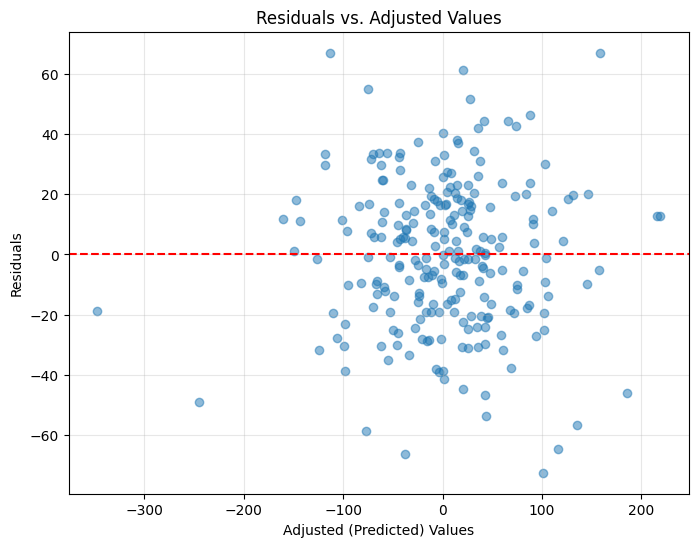

In [14]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asegúrate de que 'model' esté definido (ajusta tu modelo OLS con df_diff)
X = sm.add_constant(df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']])
y = df_diff['Exportaciones']
model = sm.OLS(y, X).fit()

# Obtener residuos y valores ajustados
residuals = model.resid
fitted_values = model.fittedvalues

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Adjusted (Predicted) Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Adjusted Values')
plt.grid(True, alpha=0.3)
plt.show()

## Bar Chart of Coefficients
Allows us to compare the magnitude and relative impact on the dependent variable. Supporting the range of coefficients we have previously calculated.

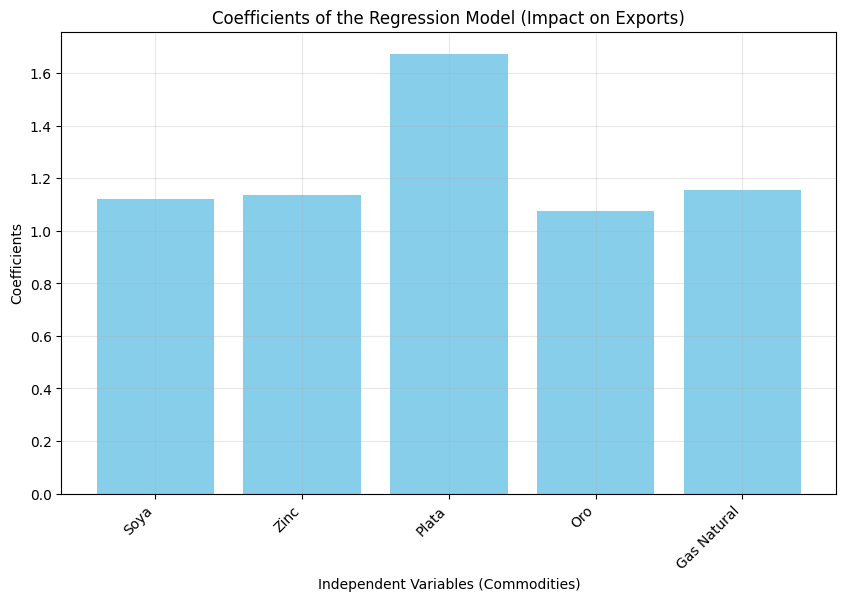

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Asegúrate de que 'model' esté definido (ajusta tu modelo OLS con df_diff)
X = sm.add_constant(df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']])
y = df_diff['Exportaciones']
model = sm.OLS(y, X).fit()

# Crear un DataFrame con los coeficientes (excluyendo la constante)
coef_df = pd.DataFrame({'Variable': X.columns[1:], 'Coeficiente': model.params[1:]})

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Variable'], coef_df['Coeficiente'], color='skyblue')
plt.title('Coefficients of the Regression Model (Impact on Exports)')
plt.xlabel('Independent Variables (Commodities)')
plt.ylabel('Coefficients')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.show()

## Correlation Matrix
We have verified that there is no multicollinearity in the model, and the following matrix is useful to present the relationship between independent variables.

Parameters to follow: 

Values close to 1 or -1 = high positive or negative correlation.

Values close to 0 = low correlation (Absence of Multicollinearity).

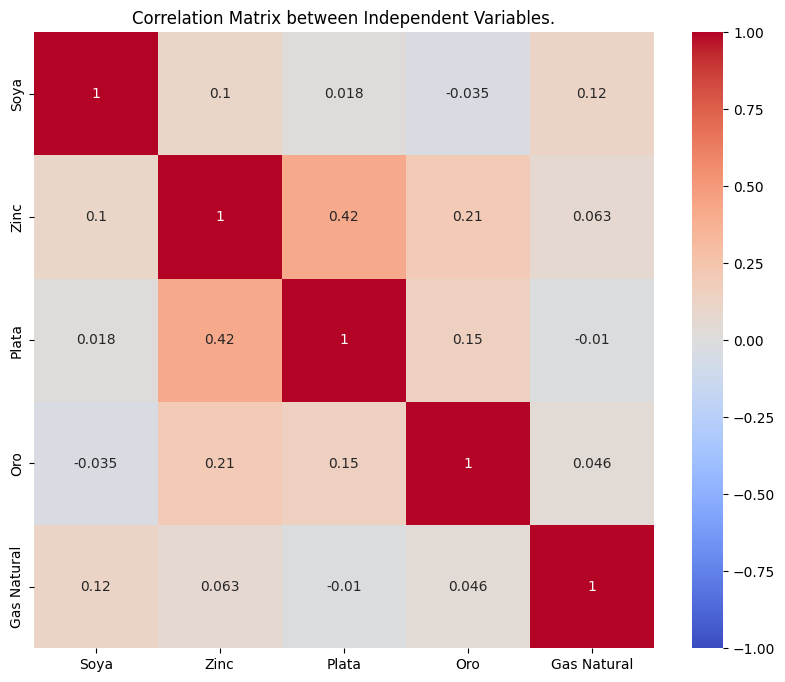

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables independientes
correlation_data = df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']]

# Crear la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix between Independent Variables.')
plt.show()